Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

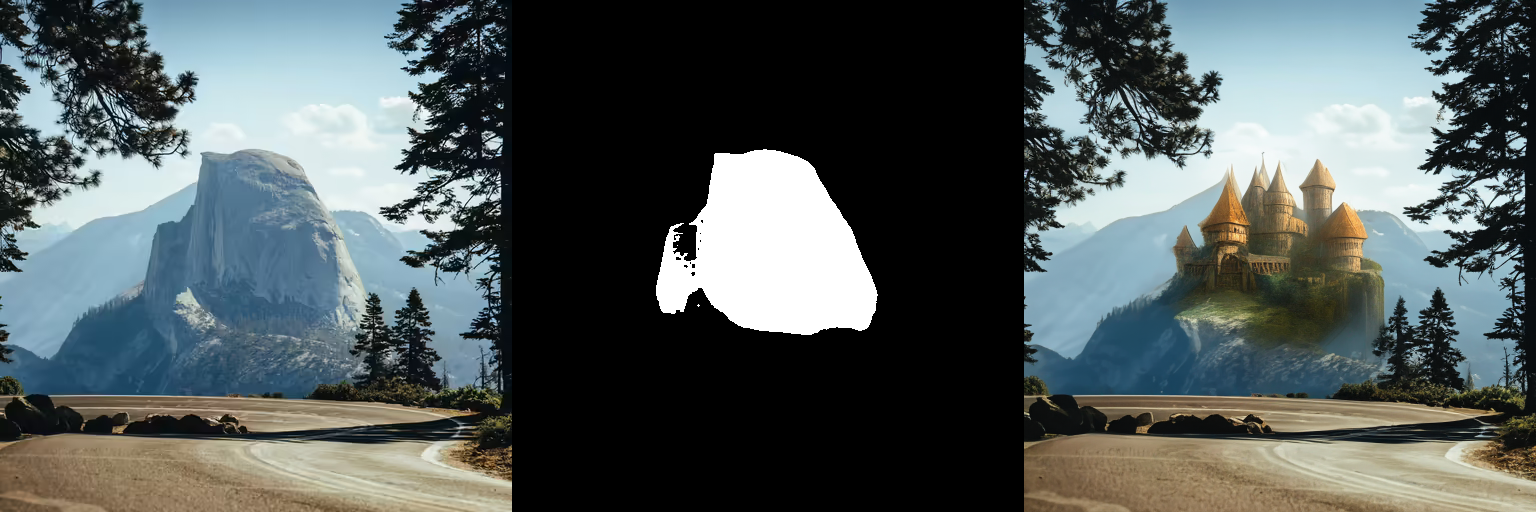

In [12]:
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForInpainting.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder-inpaint", torch_dtype=torch.float16
)
pipeline.enable_model_cpu_offload()
# remove following line if xFormers is not installed or you have PyTorch 2.0 or higher installed
# pipeline.enable_xformers_memory_efficient_attention()

# load base and mask image
# init_image = load_image("image\WechatIMG845.jpg")
# mask_image = load_image("image\image.webp")

init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

# generator = torch.Generator("cuda").manual_seed(92)
generator = torch.Generator("cuda").manual_seed(114514)
prompt = "concept art digital painting of an elven castle, inspired by lord of the rings, highly detailed, 8k"
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)

  0%|          | 0/50 [00:00<?, ?it/s]

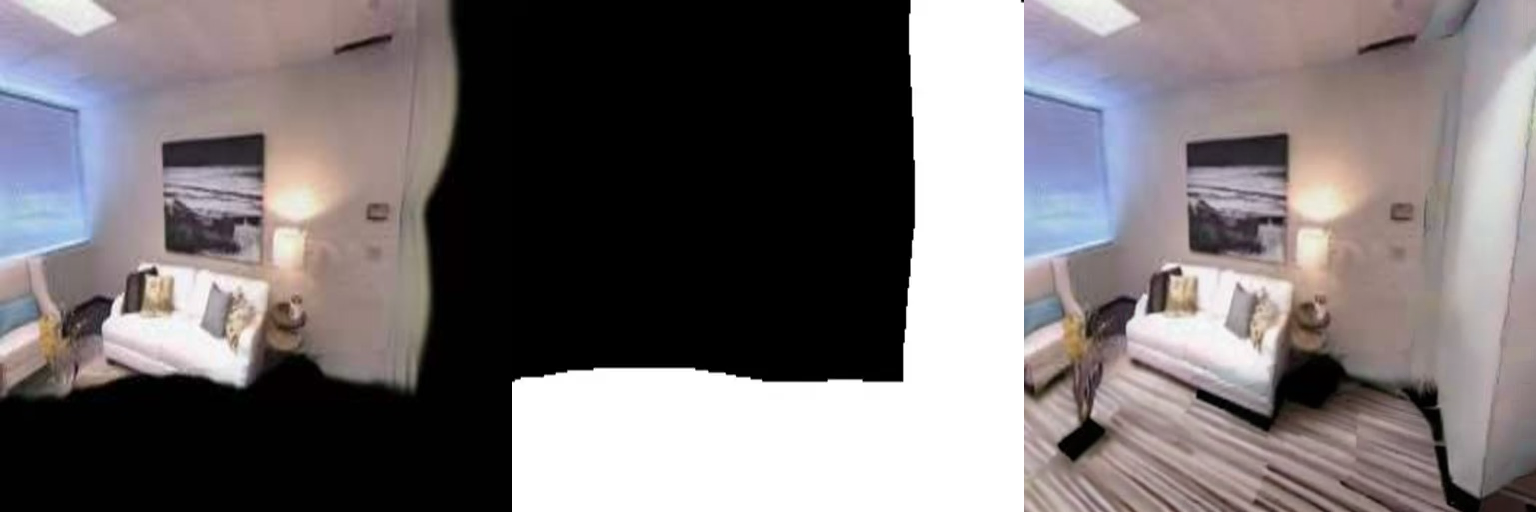

In [22]:
# load base and mask image
# init_image = load_image("image\WechatIMG845.jpg")
# mask_image = load_image("image\image.webp")
init_image = load_image("image/room-512.jpg")
mask_image = load_image("image/room-mask-512.webp")

# init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
# mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

# generator = torch.Generator("cuda").manual_seed(92)
generator = torch.Generator("cuda").manual_seed(114514)
# prompt = "concept art digital painting of an elven castle, inspired by lord of the rings, highly detailed, 8k"
prompt = 'The image is a photo taken from a first-person perspective, showing a person walking into a room. The room appears to be a modern office space with a large window and a white couch.'
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

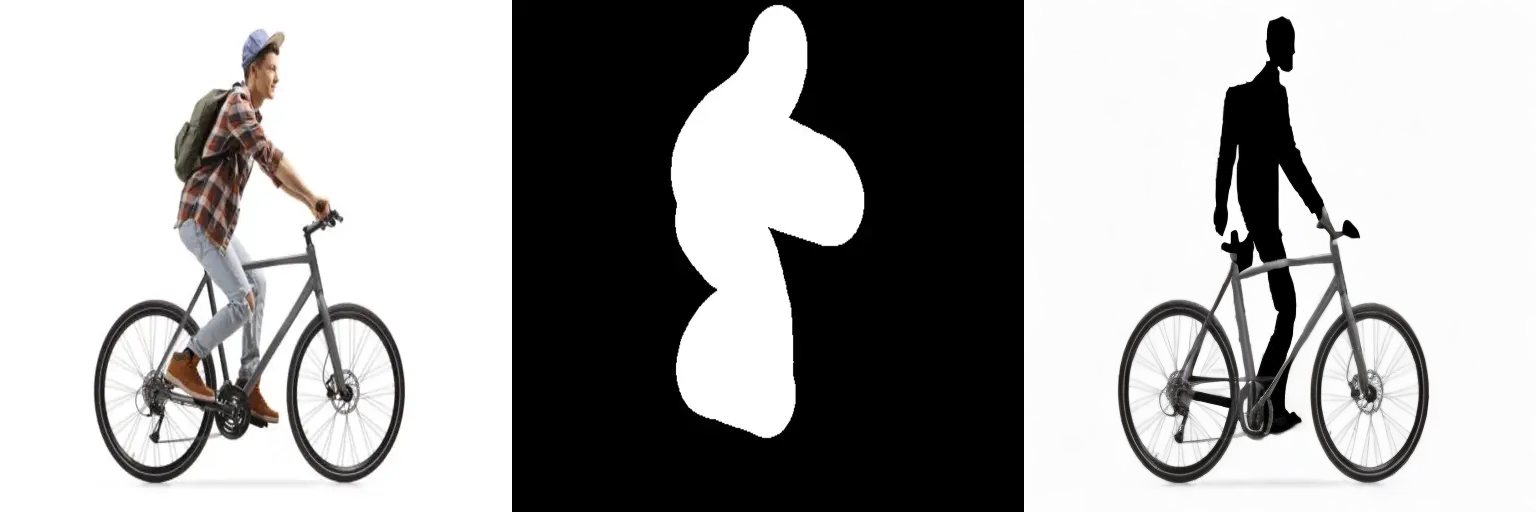

In [19]:
from diffusers import StableDiffusionInpaintPipeline
pipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipeline.to("cuda")
# prompt = "Face of a yellow cat, high resolution, sitting on a park bench"
# #image and mask_image should be PIL images.
# #The mask structure is white for inpainting and black for keeping as is
# image = pipe(prompt=prompt, image=image, mask_image=mask_image).images[0]
# image.save("./yellow_cat_on_park_bench.png")

# load base and mask image
init_image = load_image("image/bike-512.webp")
mask_image = load_image("image/bike_mask_512.webp")

# init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint.png")
# mask_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/inpaint_mask.png")

# generator = torch.Generator("cuda").manual_seed(92)
generator = torch.Generator("cuda").manual_seed(114514)
# prompt = "concept art digital painting of an elven castle, inspired by lord of the rings, highly detailed, 8k"
prompt = 'The image is a screenshot from a video or a photo taken from a first-person perspective, showing a person walking into a room. The room appears to be a modern office space with a large window and a white couch.'
image = pipeline(prompt=prompt, image=init_image, mask_image=mask_image, generator=generator).images[0]
make_image_grid([init_image, mask_image, image], rows=1, cols=3)